In [1]:
import pandas as pd
import geopandas as gp
from shapely.geometry import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import flopy as fp
from flopy.utils.gridintersect import GridIntersect
from flopy.utils import Raster
import rasterio

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


In [2]:
def resample_rast(rast_path,grid,band=1):
    arr = Raster.load(rast_path)
    arr = arr.resample_to_grid(grid.xcellcenters,grid.ycellcenters,band)
    return arr

In [3]:
# extract boundaries data from surfaces
MNT_path = "../../data/surfaces_geoter_decoup/TOPO (inf 0 en mer).asc"
x0,y0,x1,y1 = rasterio.open(MNT_path).bounds
x1 -= 3e4
# set resolution of the array
res = 50
Lx = x1-x0
Ly = y1-y0
nrow = int(Ly/res)
ncol = int(Lx/res)

#create grid with flopy
grid = fp.discretization.StructuredGrid(delc=res*np.ones([nrow]),delr=res*np.ones([ncol]),xoff=x0,yoff=y0)
ix = GridIntersect(grid)

In [4]:
shp = "zones_irrigation/zCan.shp" # a shp polygon near Canet where irrigation is only provided by wells
parcelles = "parcelles/Parcelles.shp" # a shp with mulitple polygons, one per culture on the plain
zones_irr = "zones_irrigation/Zirr_mod.shp" #list of irrigation zones made by Brli

In [5]:
#load shp
parc = gp.read_file(parcelles)
zCan = gp.read_file(shp)
zIrr = gp.read_file(zones_irr)

#append the polygon from Canet

zCan["Surf_Z_Ha"] = zCan.geometry[0].area/1e4 #get area
zCan["Irr_forage"] = 1 # add info about irrgation source
zCan["X_p"] = 0.1

zIrr = zIrr.append(zCan,sort=False).reset_index(drop=True)

# ajout d'une colonne pour l'irrigation par canaux
zIrr["Irr_can"] = 1-zIrr["Irr_forage"]
zIrr.loc[zIrr["Zones"]=="Zone 4","Irr_can"]=0

In [6]:
zIrr

,Id,Zones,Types,Surf_Z_Ha,Etiquette,ZC,Irr_forage,X_p,geometry,Irr_can
0,0.0,Zone 7,Irrigation par canaux du bassin du Tech (100 %),1235.030000,Zone 7 : Irrigation par canaux du bassin du Te...,2,0.00,0.36,"POLYGON ((689548.932 6159779.286, 689330.629 6...",1.00
1,0.0,Zone 8,Irrigation mixte : Canaux _ Tech (20 %) / Fora...,1694.310000,Zone 8 : Irrigation mixte : Canaux _ Tech (20 ...,3,0.80,0.32,"POLYGON ((702638.710 6164713.007, 702702.478 6...",0.20
2,0.0,Zone 7,Irrigation par canaux du bassin du Tech (100 %),1227.440000,Zone 7 : Irrigation par canaux du bassin du Te...,2,0.00,0.00,"MULTIPOLYGON (((683722.928 6156383.584, 683813...",1.00
3,0.0,Zone 4,Irrigation sous pression par VdR (30 %) / Fora...,7033.390000,Zone 4 : Irrigation sous pression par VdR (30 ...,3,0.70,0.50,"POLYGON ((700069.343 6173529.460, 701428.421 6...",0.00
4,0.0,Zone 2B,Irrigation mixte : Canaux de la TÃÂªt (70 %) ...,799.450000,Zone 2B : Irrigation mixte : Canaux de la TÃÂ...,3,0.30,0.40,"POLYGON ((678247.347 6173329.417, 678248.682 6...",0.70
5,0.0,Zone 3B,Irrigation mixte : Canaux _ TÃªt (Transfert h...,410.770000,Zone 3B : Irrigation mixte : Canaux _ TÃªt (T...,3,0.75,0.23,"POLYGON ((691908.474 6179742.319, 691911.937 6...",0.25
6,0.0,Zone 3,Irrigation mixte : Canaux _ TÃªt / Forages (> ...,402.030000,Zone 3 : Irrigation mixte : Canaux _ TÃªt / Fo...,3,0.75,0.20,"POLYGON ((692589.108 6178710.935, 693491.651 6...",0.25
7,0.0,Zone 3,Irrigation mixte : Canaux _ TÃªt / Forages (> ...,1766.310000,Zone 3 : Irrigation mixte : Canaux _ TÃªt / Fo...,3,0.75,0.40,"POLYGON ((681182.001 6177675.798, 681201.069 6...",0.25
8,0.0,Zone 3,Irrigation mixte : Canaux _ TÃªt / Forages (> ...,5964.980000,Zone 3 : Irrigation mixte : Canaux _ TÃªt / Fo...,2,0.75,0.40,"POLYGON ((673869.847 6177678.511, 673893.666 6...",0.25
9,0.0,Zone 6,Irrigation mixte : Canaux_ Agly (< 20 %) / For...,233.280000,Zone 6 : Irrigation mixte : Canaux_ Agly (< 20...,3,0.80,0.23,"POLYGON ((694653.450 6185424.447, 694630.271 6...",0.20


In [7]:
#calculate area per culture type and by zones
surf=[]

## calculate surface for each culture
for zi in range(zIrr.shape[0]):
    mask=[]
    for p in range(parc.shape[0]):
        mask.append(zIrr.geometry[zi].intersects(parc.geometry[p]))
    df = parc.loc[mask].groupby(["Name"]).sum()["Surf_P_Ha"]
    
    surf_mar=0
    surf_verg=0
    for i in range(df.shape[0]):
        if df.index[i] == "Verger":
            surf_verg = df.values[i]
        if df.index[i] == 'Maraichage':
            surf_mar = df.values[i]
                    
    surf.append((zIrr.loc[zi,"Zones"],surf_mar,surf_verg))

In [8]:
surf = pd.DataFrame(surf,columns=["Zones","area_maraichage [Ha]","area_verger [Ha]"])

- maraichage 90 % d'hiver 10 % d'été
- verger 30 % abricots et 70 % pêchers

In [9]:
mara_e = np.array([353,417,494])
mara_h = np.array([25,46,60])
abr = np.array([144,190,252])
pech = np.array([458,545,648])

In [10]:
verger = 0.3*abr+0.7*pech
mara = 0.9*mara_h+0.1*mara_e

# facteur besoins
z=3
besoins = np.ones([zIrr.shape[0],2])
for i,z in enumerate(zIrr["ZC"]):
    besoins[int(i)] = [mara[z-1],verger[z-1]]

W_need = surf.set_index("Zones")*10*besoins
W_need.columns = ["w_need_mar [m$^3$]","w_need_verg [m$^3$]"]

In [11]:
cm = sns.light_palette("blue", as_cmap=True)
W_need.reset_index().style.background_gradient(cmap=cm)

,Zones,w_need_mar [m$^3$],w_need_verg [m$^3$]
0,Zone 7,6465.18,1.17189e+06
1,Zone 8,88107.1,1.07809e+06
2,Zone 7,1969.47,236088
3,Zone 4,441208,2.09373e+06
4,Zone 2B,20855.8,2.53243e+06
5,Zone 3B,24867.7,28312.2
6,Zone 3,112634,212103
7,Zone 3,96172.3,328104
8,Zone 3,96637,7.34803e+06
9,Zone 6,754.82,506180


In [12]:
print("Total Water need: {} m3".format(W_need.sum().iloc[0:2].sum()))
print("Calculs de Brli : 30 millions de m3")

Total Water need: 26063115.27 m3
Calculs de Brli : 30 millions de m3


Il manque l'intégration de quelques cultures en dehors des shp, ainsi que des prairies

In [13]:
# sum water need
df = W_need.sum(axis=1).reset_index()
df.columns = ["Zones","Water_need/year"]

In [14]:
# merge data and get water need in mm/y
data_irrig = pd.merge(zIrr.reset_index(),df.reset_index()).drop("index",axis=1).loc[:,["Zones","Irr_forage","geometry","Surf_Z_Ha","Water_need/year","Irr_can","X_p"]]
data_irrig["Wneed [mm/year]"] = data_irrig.loc[:,"Water_need/year"]/data_irrig.loc[:,"Surf_Z_Ha"]*1e-1
#data_irrig = data_irrig.drop(["Water_need/year","Surf_Z_Ha"],axis=1)

In [15]:
data_irrig.head()

,Zones,Irr_forage,geometry,Surf_Z_Ha,Water_need/year,Irr_can,X_p,Wneed [mm/year]
0,Zone 7,0.0,"POLYGON ((689548.932 6159779.286, 689330.629 6...",1235.03,1178356.43,1.0,0.36,95.411158
1,Zone 8,0.8,"POLYGON ((702638.710 6164713.007, 702702.478 6...",1694.31,1166193.38,0.2,0.32,68.829989
2,Zone 7,0.0,"MULTIPOLYGON (((683722.928 6156383.584, 683813...",1227.44,238057.87,1.0,0.00,19.394665
3,Zone 4,0.7,"POLYGON ((700069.343 6173529.460, 701428.421 6...",7033.39,2534934.68,0.0,0.50,36.041435
4,Zone 2B,0.3,"POLYGON ((678247.347 6173329.417, 678248.682 6...",799.45,2553289.46,0.7,0.40,319.380757


#### Calcul des prélèvements agricoles sur la base des besoins en eaux X le mode d'adduction de chaque zone

In [16]:
arr_Q = np.zeros([nrow,ncol])
arr_P = np.zeros([nrow,ncol])
for iz in range(data_irrig.shape[0]):
    res = ix.intersect_polygon(data_irrig.geometry[iz])
    for cellid in res.cellids:
        arr_Q[cellid[0],cellid[1]] = -data_irrig.loc[iz,"Wneed [mm/year]"]*data_irrig.loc[iz,"Irr_forage"]*(1-data_irrig.loc[iz,"X_p"])
        arr_P[cellid[0],cellid[1]] = -data_irrig.loc[iz,"Wneed [mm/year]"]*data_irrig.loc[iz,"Irr_forage"]*(data_irrig.loc[iz,"X_p"])

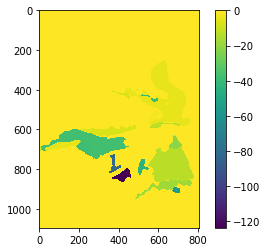

In [17]:
arr = np.round(arr_P,decimals=1)
plt.imshow(arr)
plt.colorbar()

#### Calcul des prélèvements dans la couche sup + dans le pliocène

In [18]:
def arr2ascii(arr,filename,x0,y0,res,nodata=-9999):
    ncol = arr.shape[1]
    nrow = arr.shape[0]
    with open(filename,"w") as file:
        file.write("ncols {}\n".format(ncol))
        file.write("nrows {}\n".format(nrow))
        file.write("xllcorner {}\n".format(x0))
        file.write("yllcorner {}\n".format(y0))
        file.write("cellsize {}\n".format(res))
        file.write("nodata_value {}\n".format(nodata))
        for irow in range(nrow):
            for icol in range(ncol):
                file.write(str(arr[irow,icol])+" ")

In [19]:
arr2ascii(arr_Q,"../../data/prélèvements/prlvm_agri_Q.asc",x0,y0,50)
arr2ascii(arr_P,"../../data/prélèvements/prlvm_agri_P.asc",x0,y0,50)

In [20]:
(arr_P/1000*50*50).sum()

-6563249.092876333

#### Calcul des retours nappes des canaux

In [21]:
coeff = 2 # !!! Coefficient de 2 déjà appliqué donc coeff à définir entre 1 et 2 dans le modèle.

rch_a = np.zeros([nrow,ncol])
for iz in range(data_irrig.shape[0]):
    res = ix.intersect_polygon(data_irrig.geometry[iz])
    for cellid in res.cellids:
        rch_a[cellid[0],cellid[1]] = data_irrig.loc[iz,"Wneed [mm/year]"]*data_irrig.loc[iz,"Irr_can"]*coeff

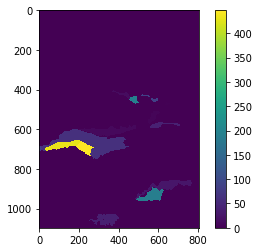

In [22]:
rch_a = np.round(rch_a,decimals=1)
plt.imshow(rch_a)
plt.colorbar()

In [23]:
arr2ascii(rch_a,"../../data/recharge/rast_irr.asc",x0,y0,50)

In [24]:
(rch_a/1000*50*50).sum()

17003931.25